In [1]:
from morphology import *
from itkwidgets import view
import pyvista as pv

In [2]:
path = r"C:\Users\admin\bric-morphology\studies\1\data\Lesion.nii"
d = run(path)

invalid value encountered in true_divide
invalid value encountered in sqrt
invalid value encountered in sqrt
invalid value encountered in true_divide


In [3]:
img = nib.load(path)
mri_3d_voxels = img.get_fdata()
mri_3d_voxels[mri_3d_voxels > 0] = 255

n = d.isosurface.verts.shape[0]
faces_rows = d.isosurface.faces.shape[0]
faces = np.column_stack([3*np.ones((faces_rows,1),dtype=np.int),d.isosurface.faces])
vertices = d.isosurface.verts
faces_count = np.prod(faces.shape)
faces1 = faces.flatten()[0:faces_count]
vertices, faces
curvedness_surf = pv.PolyData(vertices, faces1)
curvedness = d.surface_measures.curvedness.flatten()[0:n]
curvedness = np.nan_to_num(curvedness)
curvedness_surf.point_arrays['curvedness'] = curvedness

shape_index_surf = pv.PolyData(vertices, faces1)
shape_index = d.surface_measures.shape_index.flatten()[0:n]
shape_index = np.nan_to_num(shape_index)
shape_index_surf.point_arrays['shape_index'] = shape_index

sharpness_surf = pv.PolyData(vertices, faces1)
sharpness = d.surface_measures.sharpness.flatten()[0:n]
sharpness = np.nan_to_num(shape_index)
sharpness_surf.point_arrays['sharpness'] = sharpness

total_curvature_surf = pv.PolyData(vertices, faces1)
total_curvature = d.surface_measures.total_curvature.flatten()[0:n]
total_curvature = np.nan_to_num(shape_index)
total_curvature_surf.point_arrays['total_curvature'] = total_curvature

point_cloud = pv.PolyData(vertices)

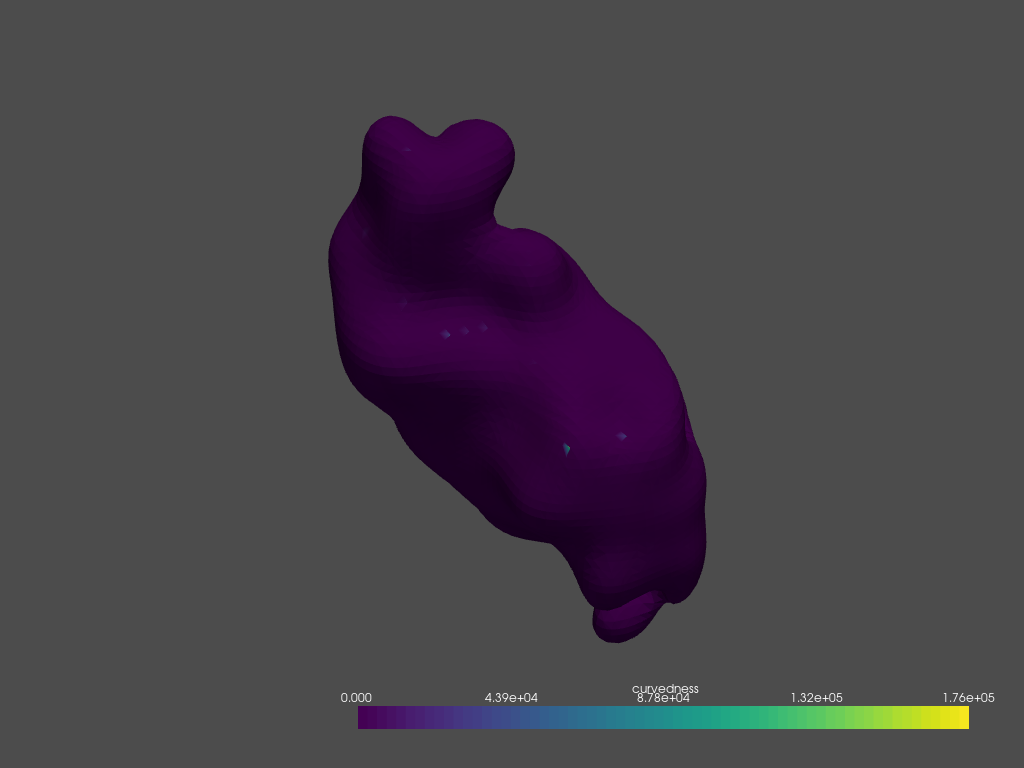

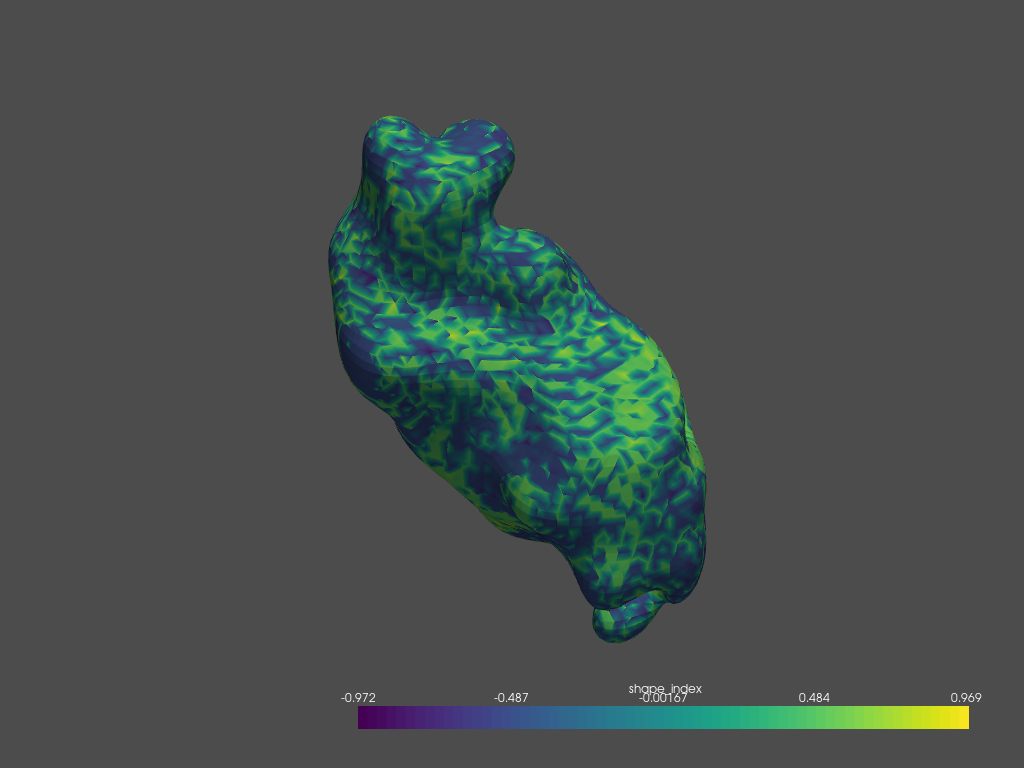

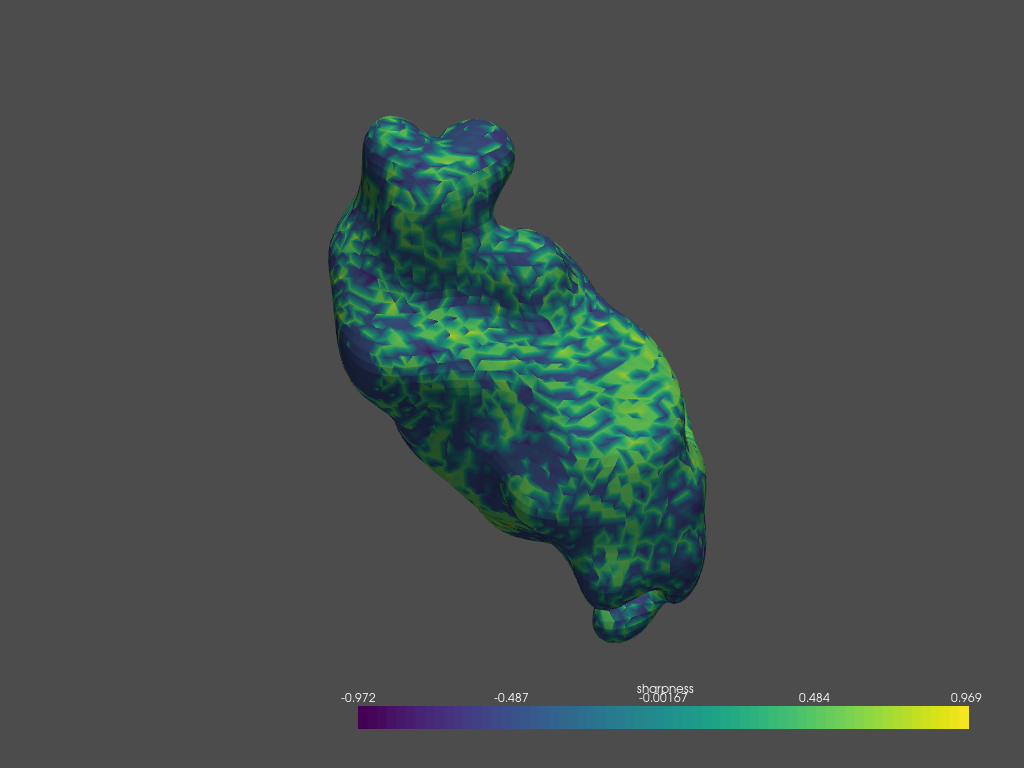

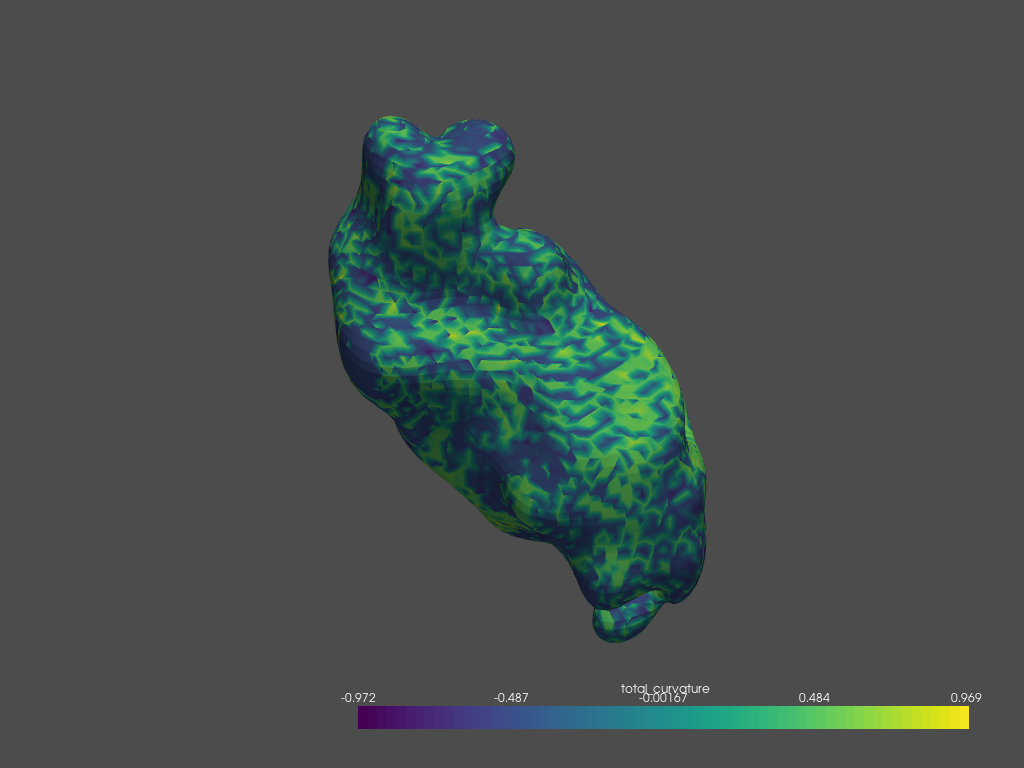

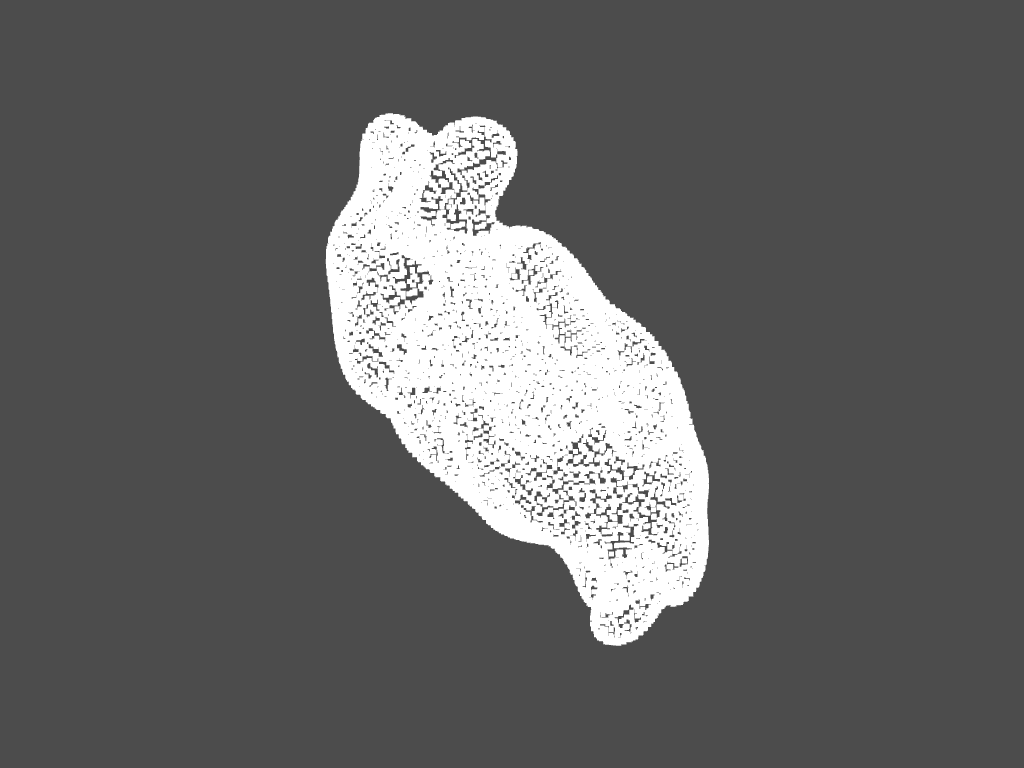

In [4]:
surfaces = [curvedness_surf, shape_index_surf, sharpness_surf, total_curvature_surf, point_cloud]
for graph in surfaces:
    graph.plot()

In [5]:
view(geometries=surfaces,axes=True,slicing_planes=True)

Viewer(axes=True, geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points…